In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import stats

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [3]:
data =  pd.read_csv("Data_3.csv")

In [5]:
data.head()

,Unnamed: 0,ROA(A) before interest and % after tax,Operating Profit Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Cash flow rate,Net Value Per Share (A),Cash Flow Per Share,Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,...,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Debt ratio %,Regular Net Profit Growth Rate,Current Liability to Current Assets,Bankrupt?
0,0,-0.099779,-0.000030,-0.000806,-0.000367,-0.007100,-0.053655,-0.011047,-0.000085,0.000068,...,-0.000649,-0.004654,-0.007203,-0.000958,-0.000902,-0.085243,0.123504,-0.000282,0.173405,1
1,2,-0.044819,-0.000086,-0.001362,-0.000764,-0.006822,-0.016503,-0.015148,0.002111,0.000013,...,-0.000040,-0.004657,-0.002334,-0.001098,-0.001131,-0.085222,0.123437,0.000013,-0.011265,1
2,3,-0.079469,-0.000165,-0.000168,-0.000222,-0.001537,-0.045632,-0.002153,-0.000274,-0.000035,...,-0.000618,-0.016292,-0.003470,-0.000664,-0.000494,-0.058712,0.057083,-0.000204,0.088855,1
3,5,-0.106889,-0.000136,-0.000380,-0.000319,-0.001423,-0.043865,0.001111,-0.001903,-0.000048,...,-0.000823,-0.011962,-0.006078,-0.000729,-0.000577,-0.073808,0.092666,-0.000163,0.145001,1
4,6,-0.083620,-0.000018,-0.000654,-0.000257,-0.004978,-0.039773,-0.006567,-0.000051,0.000137,...,-0.000157,0.007180,-0.006056,-0.000891,-0.000802,-0.088422,0.132766,-0.000517,0.076035,0


In [143]:
data_copy = pd.concat([data_copy, data[" Current Liability to Current Assets"]], axis = 1)

In [6]:
data = data + data.min()

In [344]:
data_copy.drop([" Inventory/Current Liability"], axis = 1, inplace = True)

In [145]:
data_copy.drop(len(data_copy) - 1, inplace = True)

In [6]:
ratio_df = pd.DataFrame(data = data_copy.drop(["Bankrupt?"], axis = 1).describe().loc["max"] )

In [7]:
ratio_features = ratio_df[ratio_df["max"]==1].index.tolist()

In [8]:
int_features = ratio_df[ratio_df["max"]!=1].index.tolist()

In [315]:
data_feat = data_copy.drop("Bankrupt?", axis = 1)

In [246]:
data_feat = data_feat - data_feat.mean()

In [264]:
data_copy[" Cash flow rate"].describe()

count    6819.000000
mean        0.467431
std         0.017036
min         0.000000
25%         0.461558
50%         0.465080
75%         0.471004
max         1.000000
Name:  Cash flow rate, dtype: float64

In [377]:
Q1 = data_feat.quantile(0.10)
Q3 = data_feat.quantile(0.90)

In [378]:
IQR = Q3 - Q1

In [379]:
df = data_feat[~((data_feat < (Q1-6*IQR)) | (data_feat > (Q3 + 6*IQR))).any(axis = 1)]

In [83]:
df.join([df, data["Bankrupt?"]], axis = 1)

In [364]:
df = df - df.mean()

In [389]:
df = pd.merge(df, data["Bankrupt?"], left_index = True, right_index = True)

In [390]:
df.shape

(5567, 54)

In [391]:
df[df["Bankrupt?"]==1]

,ROA(A) before interest and % after tax,Operating Profit Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Cash flow rate,Net Value Per Share (A),Cash Flow Per Share,Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Continuous Net Profit Growth Rate,...,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Debt ratio %,Regular Net Profit Growth Rate,Current Liability to Current Assets,Bankrupt?
0,-0.099779,-0.000030,-0.000806,-0.000367,-0.007100,-0.053655,-0.011047,-0.000085,0.000067,-0.000069,...,-0.000649,-0.004654,-0.007203,-0.000958,-0.000902,-0.085243,0.123504,-0.000282,0.173405,1.0
2,-0.044819,-0.000086,-0.001362,-0.000764,-0.006822,-0.016503,-0.015148,0.002111,0.000013,0.000002,...,-0.000040,-0.004657,-0.002334,-0.001098,-0.001131,-0.085222,0.123437,0.000013,-0.011265,1.0
3,-0.079469,-0.000165,-0.000168,-0.000222,-0.001537,-0.045632,-0.002153,-0.000274,-0.000035,-0.000034,...,-0.000618,-0.016292,-0.003470,-0.000664,-0.000494,-0.058712,0.057083,-0.000204,0.088855,1.0
5,-0.106889,-0.000136,-0.000380,-0.000319,-0.001423,-0.043865,0.001111,-0.001903,-0.000048,-0.000035,...,-0.000823,-0.011962,-0.006078,-0.000729,-0.000577,-0.073808,0.092666,-0.000163,0.145001,1.0
54,-0.032502,-0.000045,-0.000438,-0.000202,-0.004079,-0.042319,-0.004591,0.001114,0.000025,-0.000004,...,-0.004160,-0.007565,-0.002182,-0.002654,-0.008074,-0.086299,0.126546,-0.000023,0.123568,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,-0.050552,-0.000054,-0.000114,-0.000112,-0.006023,-0.044721,-0.013332,-0.000209,-0.000084,0.000019,...,-0.000188,-0.000454,-0.003590,-0.000912,-0.000833,-0.092368,0.144677,0.000098,0.036800,1.0
6545,-0.070280,-0.000093,-0.000035,-0.000143,-0.008560,-0.045310,-0.016618,-0.000374,-0.000159,-0.000072,...,-0.000178,-0.007511,-0.003972,-0.000591,-0.000405,-0.082983,0.117122,-0.000352,0.064818,1.0
6591,-0.092457,-0.000082,-0.000583,-0.000215,-0.005838,-0.064997,-0.008235,0.000141,0.000025,0.000012,...,-0.000110,0.002593,-0.007106,-0.000757,-0.000615,-0.088595,0.133253,0.000006,0.041568,1.0
6640,-0.291859,-0.000048,-0.001919,-0.000705,0.003606,-0.174374,0.014078,-0.000517,-0.000089,-0.000172,...,-0.000278,-0.006851,0.008604,-0.000441,-0.000235,-0.150754,0.392750,-0.000924,0.073197,1.0


In [151]:
df.to_csv("Data_2.csv")

In [48]:
skew_table = pd.DataFrame(index = data.drop(["Bankrupt?",  " Current Assets/Total Assets", " Net worth/Assets", " Net Income to Total Assets", "Unnamed: 0", " Equity to Liability", " Quick Ratio", " Cash Flow to Total Assets"], axis = 1).columns)
skew_table["Skewness"] = data.drop(["Bankrupt?", " Current Assets/Total Assets", " Net worth/Assets", " Net Income to Total Assets", "Unnamed: 0", " Equity to Liability", " Quick Ratio", " Cash Flow to Total Assets"], axis = 1).skew()
skew_table["Abs_skew"] = abs(skew_table["Skewness"])
skew_table.sort_values(by = ["Abs_skew"], ascending = False, inplace = True)

In [49]:
skew_table["Kurtosis"] = data.drop(["Bankrupt?",  " Current Assets/Total Assets", " Net worth/Assets", " Net Income to Total Assets", "Unnamed: 0", " Equity to Liability", " Quick Ratio", " Cash Flow to Total Assets"], axis = 1).kurt()
skew_table.to_csv("data_distribution.csv")

In [148]:
df.kurt()

 ROA(C) before interest and depreciation before interest     3.721088
 ROA(A) before interest and % after tax                      5.881315
 ROA(B) before interest and depreciation after tax           5.168928
 Operating Gross Margin                                     10.411479
 Realized Sales Gross Margin                                10.497564
                                                              ...    
 Liability to Equity                                        25.996739
 Degree of Financial Leverage (DFL)                         36.109429
 Interest Coverage Ratio (Interest expense to EBIT)         49.244425
 Equity to Liability                                        26.857306
Bankrupt?                                                   32.935933
Length: 95, dtype: float64

In [147]:
df.skew()

 ROA(C) before interest and depreciation before interest   -0.112031
 ROA(A) before interest and % after tax                    -0.667918
 ROA(B) before interest and depreciation after tax         -0.408314
 Operating Gross Margin                                     0.340026
 Realized Sales Gross Margin                                0.340514
                                                              ...   
 Liability to Equity                                        3.388131
 Degree of Financial Leverage (DFL)                         3.189603
 Interest Coverage Ratio (Interest expense to EBIT)        -2.425427
 Equity to Liability                                        4.020415
Bankrupt?                                                   5.909669
Length: 95, dtype: float64

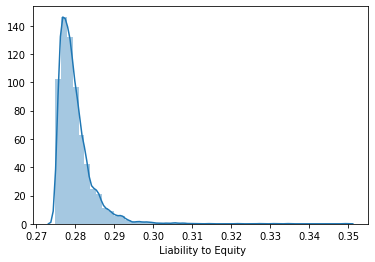

In [146]:
sns.distplot(df[" Liability to Equity"])

In [4]:
data.drop([ " Current Assets/Total Assets", " Net worth/Assets", " Net Income to Total Assets", "Unnamed: 0", " Equity to Liability", " Quick Ratio", " Cash Flow to Total Assets"], axis = 1, inplace = True)

In [6]:
data.to_excel("Data_3.xlsx")

In [45]:
vf.sort_values(by = ["VIF"], ascending = False).to_csv("vif.csv")

In [43]:
vf = pd.DataFrame(index = data.drop(["Bankrupt?", " Current Assets/Total Assets", " Net worth/Assets", " Net Income to Total Assets", "Unnamed: 0", " Equity to Liability", " Quick Ratio", " Cash Flow to Total Assets"], axis = 1).columns)
vf["VIF"] = [vif(data.drop(["Bankrupt?", " Current Assets/Total Assets", " Net worth/Assets", " Net Income to Total Assets", "Unnamed: 0", " Equity to Liability", " Quick Ratio", " Cash Flow to Total Assets"], axis = 1).values, i) for i in range(data.drop(["Bankrupt?", " Current Assets/Total Assets", " Net worth/Assets", " Net Income to Total Assets", "Unnamed: 0", " Equity to Liability", " Quick Ratio", " Cash Flow to Total Assets"],axis=1).shape[1])]
vf.sort_values(by = ["VIF"], ascending = False)[:15]

,VIF
Net Worth Turnover Rate (times),21.067155
Continuous interest rate (after tax),20.721241
Total Asset Turnover,19.544810
Operating Profit Rate,16.990279
CFO to Assets,16.407659
Cash flow rate,15.031521
ROA(A) before interest and % after tax,14.564531
Operating Funds to Liability,13.878585
Current Ratio,11.261240
Debt ratio %,9.724805


,VIF
Cash Flow to Sales,3.703061
Current Liability to Liability,8.513594
Equity to Long-term Liability,3.068114
Cash Flow to Total Assets,30.457902
Cash Flow to Liability,5.820883
CFO to Assets,17.046250
Cash Flow to Equity,16.764041
No-credit Interval,1.162244
Gross Profit to Sales,5.733618
Net Income to Stockholder's Equity,8.060747


In [52]:
pd.DataFrame(data = stats.ttest_ind(data.drop(["Bankrupt?", " Current Assets/Total Assets", " Net worth/Assets", " Net Income to Total Assets", "Unnamed: 0", " Equity to Liability", " Quick Ratio", " Cash Flow to Total Assets"], axis = 1)[data["Bankrupt?"]==1], data.drop(["Bankrupt?", " Current Assets/Total Assets", " Net worth/Assets", " Net Income to Total Assets", "Unnamed: 0", " Equity to Liability", " Quick Ratio", " Cash Flow to Total Assets"], axis = 1)[data["Bankrupt?"]==0]).pvalue, index = data.drop(["Bankrupt?", " Current Assets/Total Assets", " Net worth/Assets", " Net Income to Total Assets", "Unnamed: 0", " Equity to Liability", " Quick Ratio", " Cash Flow to Total Assets"], axis = 1).columns, columns = ["p_val"]).sort_values(by = ["p_val"], ascending = True).to_csv("sig_.csv")